In [158]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [159]:
data = pd.read_csv('../../data/obesity_final.csv')


# Categorical variables encoding

In [160]:
cat = [column for column in data.columns if data[column].dtype == 'object']
cat

['gender',
 'family_history_with_overweight',
 'favc',
 'caec',
 'smoke',
 'scc',
 'calc',
 'mtrans',
 'nobeyesdad']

In [161]:
for i in cat:
     print(f"{i}: {data[i].unique()}")

gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
favc: ['no' 'yes']
caec: ['Sometimes' 'Frequently' 'Always' 'no']
smoke: ['no' 'yes']
scc: ['no' 'yes']
calc: ['no' 'Frequently' 'Sometimes' 'Always']
mtrans: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
nobeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


## Ordinal encoding
For those categorical variables that have an intrinsic order 

In [162]:
from sklearn.preprocessing import OrdinalEncoder

# Crear una instancia de OrdinalEncoder
oe = OrdinalEncoder(categories=[
    ['no', 'Sometimes', 'Frequently', 'Always'],  # caec
    ['no', 'Frequently', 'Sometimes', 'Always'], # calc
    ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'] # nobeyesdad
])

# Encodear las variables categóricas con orden
data[['caec', 'calc', 'nobeyesdad']] = oe.fit_transform(data[['caec', 'calc', 'nobeyesdad']])



## Binary encoder

In [163]:
# Variables categóricas binarias
binary_categorical_vars = ['gender', 'family_history_with_overweight', 'favc', 'smoke', 'scc']

# Aplicar codificación binaria a las variables categóricas binarias
for binary in binary_categorical_vars:
    data[binary] = pd.get_dummies(data[binary], drop_first=True)

In [164]:
for i in ['gender',
 'family_history_with_overweight',
 'favc',
 'caec',
 'smoke',
 'scc',
 'calc',
 'mtrans',
 'nobeyesdad']:
     print(f"{i}: {data[i].unique()}")

gender: [False  True]
family_history_with_overweight: [ True False]
favc: [False  True]
caec: [1. 2. 3. 0.]
smoke: [False  True]
scc: [False  True]
calc: [0. 1. 2. 3.]
mtrans: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
nobeyesdad: [1. 2. 3. 4. 0. 5. 6.]


## One hot encoding
For those categorical variables that have more than 2 categories and don't have any order

In [165]:
# Crear un DataFrame de ejemplo con la variable categórica mtrans
df = pd.DataFrame(data)

# Aplicar one-hot encoding con drop_first=True
encoded_df = pd.get_dummies(df['mtrans'], drop_first=True)

# Concatenar el DataFrame original con las nuevas variables dummy
df_encoded = pd.concat([df, encoded_df], axis=1)
data = df_encoded.drop('mtrans', axis=1)

# RF 

## https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/

In [166]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [167]:
X = data.drop(columns=['nobeyesdad'])
y = data['nobeyesdad']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [169]:
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [171]:
features = data.columns.tolist()

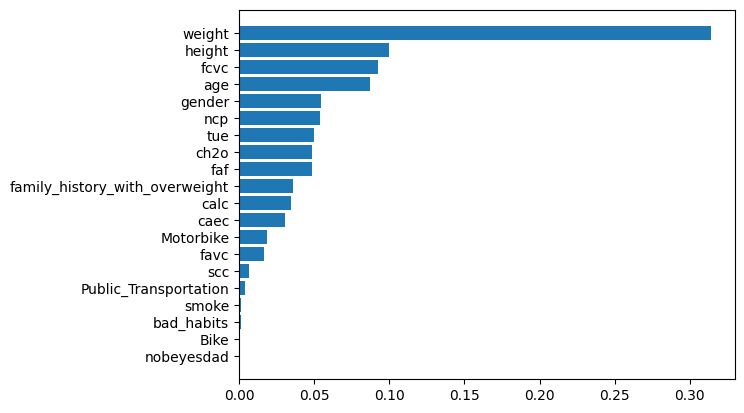

In [172]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [154]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=0),
      scoring='neg_mean_squared_error')

In [157]:
rfe.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

## https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [176]:
sel = (RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

RandomForestClassifier()

<BarContainer object of 20 artists>

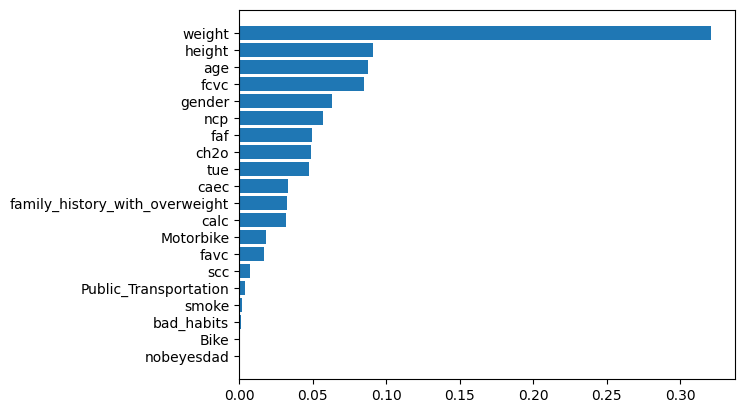

In [177]:
f_i = list(zip(features,sel.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])


In [173]:
selected_features = np.array(features)[rfe.get_support()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 21 but corresponding boolean dimension is 20

In [178]:
#To see which features are important we can use get_support method on the fitted model.

sel.get_support()   

AttributeError: 'RandomForestClassifier' object has no attribute 'get_support'

In [91]:
#make a list and count the selected features

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

6

In [92]:
print(selected_feat)

Index(['gender', 'age', 'height', 'weight', 'fcvc', 'ncp'], dtype='object')


In [93]:
#check and plot the distribution of importance: returns a histogram showing the distribution of the features selected using this feature selection technique.
pd.Series(sel.estimator_,feature_importances_,.ravel()).hist()


SyntaxError: invalid syntax (3758444921.py, line 2)